<a href="https://colab.research.google.com/github/220620cs06/just/blob/main/LAB(9_10).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Adding Noise to Images

1.1. Gaussian Noise

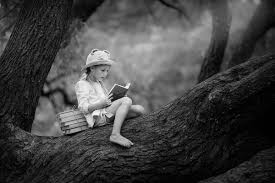

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
from skimage import io

image=cv2.imread('/content/girl.jpg')
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
cv2_imshow(image)

In [3]:
def add_gaussian_noise(gaussian, mean=0, std=1):
    gaussian_noise = np.random.normal(mean, std, image.shape)
    noisy_image = image + gaussian_noise
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image.astype('uint8')

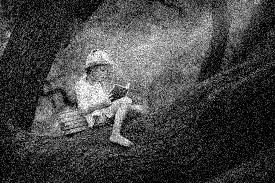

In [4]:
noisy_image = add_gaussian_noise(image, mean=0, std=30)
cv2_imshow(noisy_image)

1.2. Rayleigh Noise

In [5]:
def add_rayleigh_noise(image, scale=1):
    rayleigh_noise = np.random.rayleigh(scale, image.shape)
    noisy_image = image + rayleigh_noise
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image.astype('uint8')


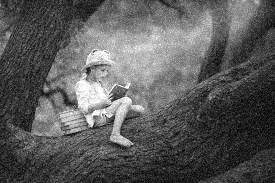

In [6]:
rayleighNoiseImage = add_rayleigh_noise(image, scale=20)
cv2_imshow(rayleighNoiseImage)


1.3. Exponential Noise

In [7]:
def add_exponential_noise(image, scale=1):

    exponential_noise = np.random.exponential(scale, image.shape)
    noisy_image = image + exponential_noise
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image.astype('uint8')


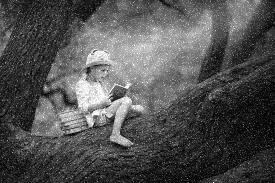

In [8]:
exponentialNoiseImage = add_exponential_noise(image, scale=16)
cv2_imshow(exponentialNoiseImage)

1.4. Salt & Pepper Noise

In [9]:
def add_salt_pepper_noise(image, salt_prob=0.05, pepper_prob=0.05):
    noisy_image = image.copy()

    num_salt = np.ceil(salt_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_salt)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 255

    num_pepper = np.ceil(pepper_prob * image.size)
    coords = [np.random.randint(0, i - 1, int(num_pepper)) for i in image.shape]
    noisy_image[coords[0], coords[1]] = 0

    return noisy_image



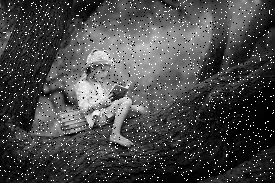

In [10]:
saltPeperNoiseImage=add_salt_pepper_noise(image, salt_prob=0.04, pepper_prob=0.03)
cv2_imshow(saltPeperNoiseImage)

1.5. Uniform Noise

In [11]:
def add_uniform_noise(image, low=0, high=10):

    uniform_noise = np.random.uniform(low, high, image.shape)
    noisy_image = image + uniform_noise
    noisy_image = np.clip(noisy_image, 0, 255)

    return noisy_image


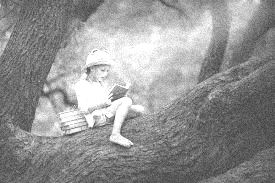

In [12]:
uniformNoiseImage = add_uniform_noise(image, low=67, high=100)
cv2_imshow(uniformNoiseImage)

2. Adding Noise to the image

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/boy.jpg', cv2.IMREAD_GRAYSCALE)


noisy_image = add_gaussian_noise(image, mean=0, std=20)

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Image with Gaussian Noise")
plt.show()






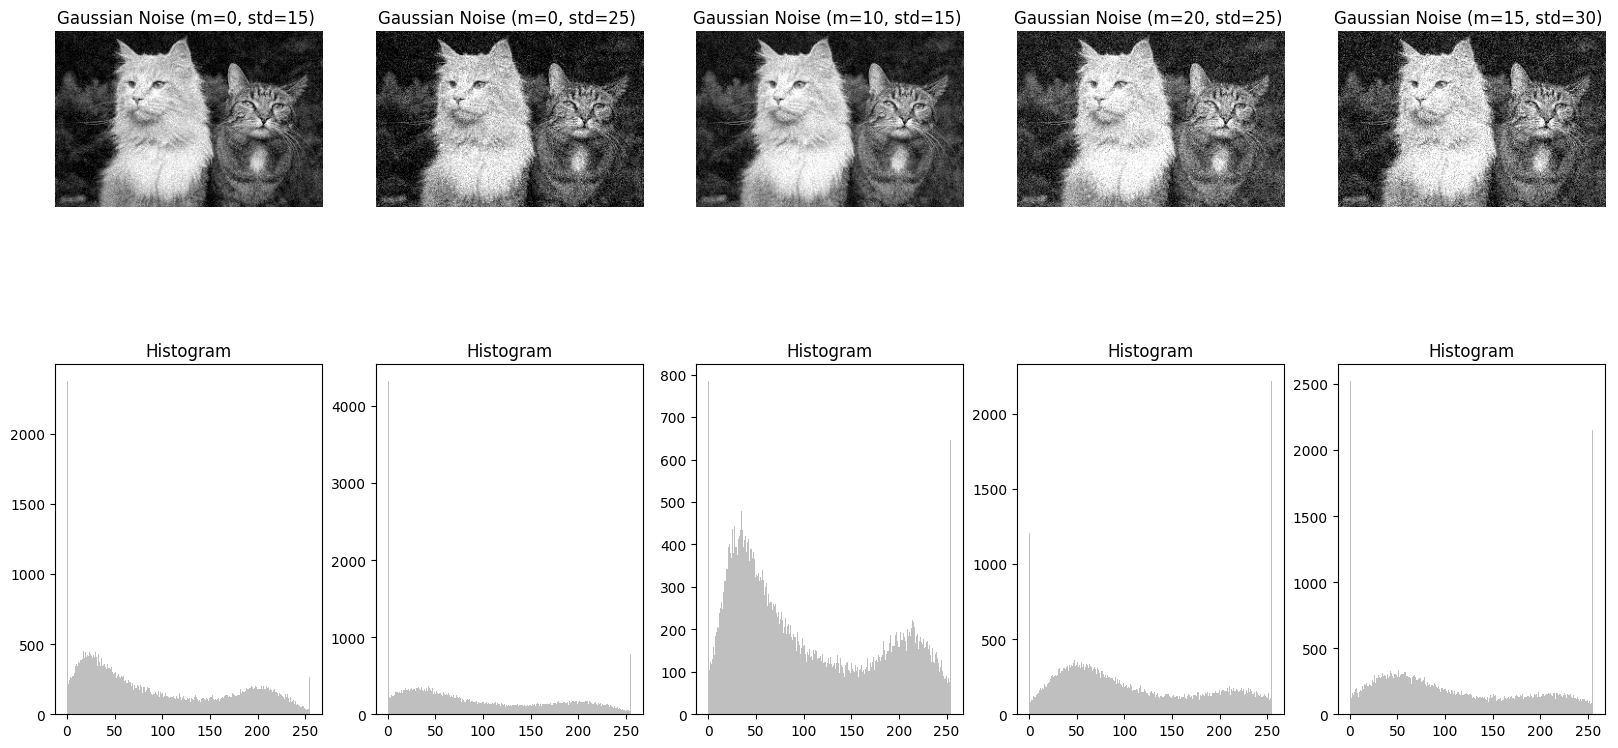

In [41]:
# All functions for noising are created above

# Displaying images with different levels of noise
def plot_histograms(noisy_images, titles):
    plt.figure(figsize=(20, 10))
    for i, (noisy_image, title) in enumerate(zip(noisy_images, titles), 1):
        plt.subplot(2, len(noisy_images), i)
        plt.imshow(noisy_image, cmap='gray')
        plt.title(title)
        plt.axis('off')

        plt.subplot(2, len(noisy_images), i + len(noisy_images))
        plt.hist(noisy_image.ravel(), bins=256, color='gray', alpha=0.5)
        plt.title("Histogram")
    plt.show()


# Task 1. 1.	Apply Gaussian noise of different mean and variance to the same input image,
# observe the histogram and the differences. (at least five combinations are required)
gaussian_images = [
    add_gaussian_noise(image, mean=0, std=15),
    add_gaussian_noise(image, mean=0, std=25),
    add_gaussian_noise(image, mean=10, std=15),
    add_gaussian_noise(image, mean=20, std=25),
    add_gaussian_noise(image, mean=15, std=30)
]
gaussian_titles = ["Gaussian Noise (m=0, std=15) ", "Gaussian Noise (m=0, std=25) ",
                   "Gaussian Noise (m=10, std=15) ", "Gaussian Noise (m=20, std=25) ",
                   "Gaussian Noise (m=15, std=30) "]

plot_histograms(gaussian_images, gaussian_titles)



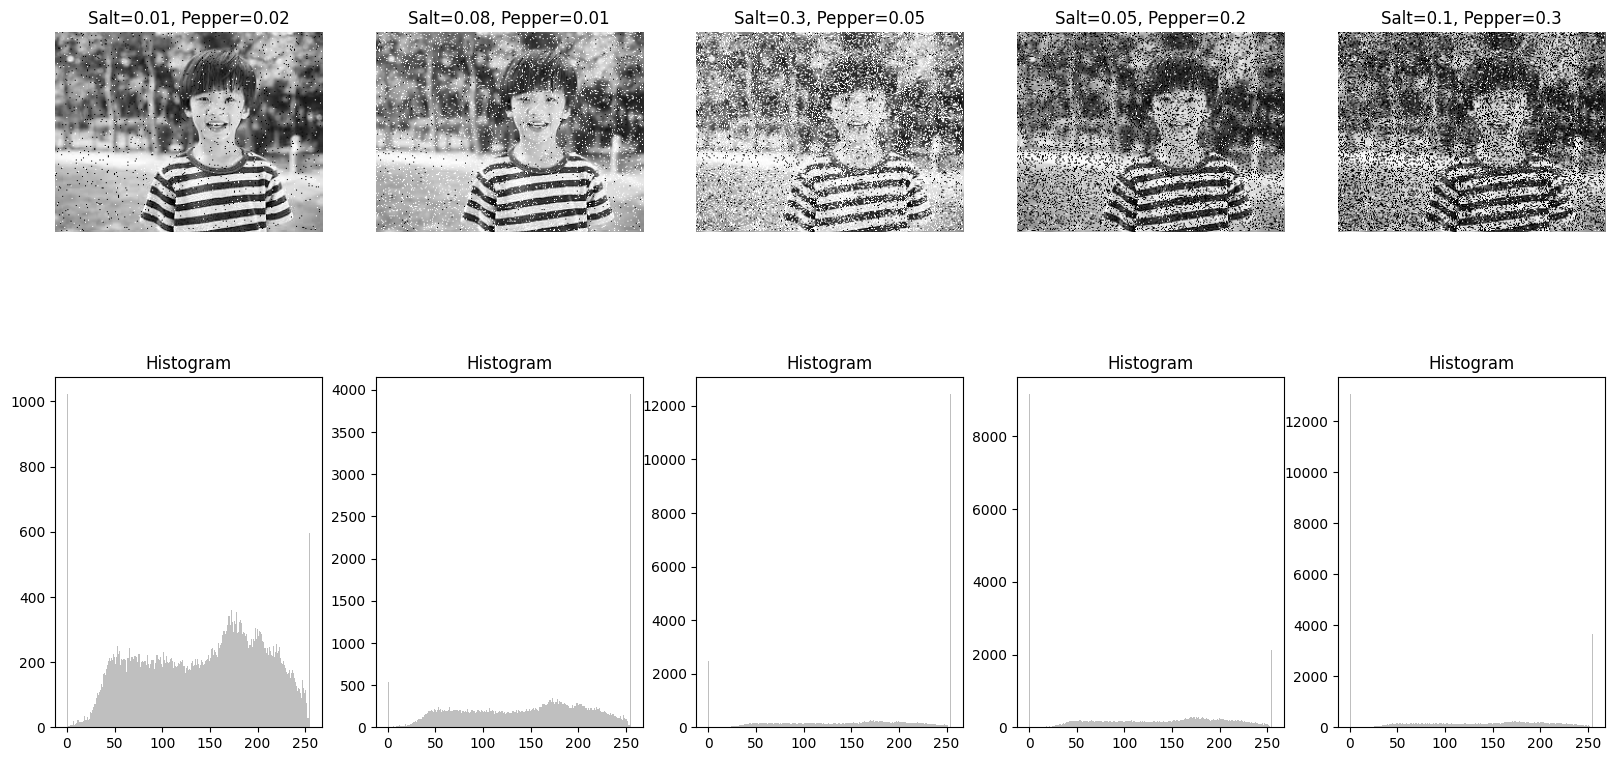

In [22]:
# 2.	Apply salt and pepper noise of different probabilities for salt and pepper, observe the image,
# its histogram and the differences. (at least five combinations are required)
sp_images = [
    add_salt_pepper_noise(image, salt_prob=0.01, pepper_prob=0.02),
    add_salt_pepper_noise(image, salt_prob=0.08, pepper_prob=0.01),
    add_salt_pepper_noise(image, salt_prob=0.3, pepper_prob=0.05),
    add_salt_pepper_noise(image, salt_prob=0.05, pepper_prob=0.2),
    add_salt_pepper_noise(image, salt_prob=0.1, pepper_prob=0.3)
]
sp_titles = ["Salt=0.01, Pepper=0.02", "Salt=0.08, Pepper=0.01",
             "Salt=0.3, Pepper=0.05", "Salt=0.05, Pepper=0.2",
             "Salt=0.1, Pepper=0.3"]

plot_histograms(sp_images, sp_titles)




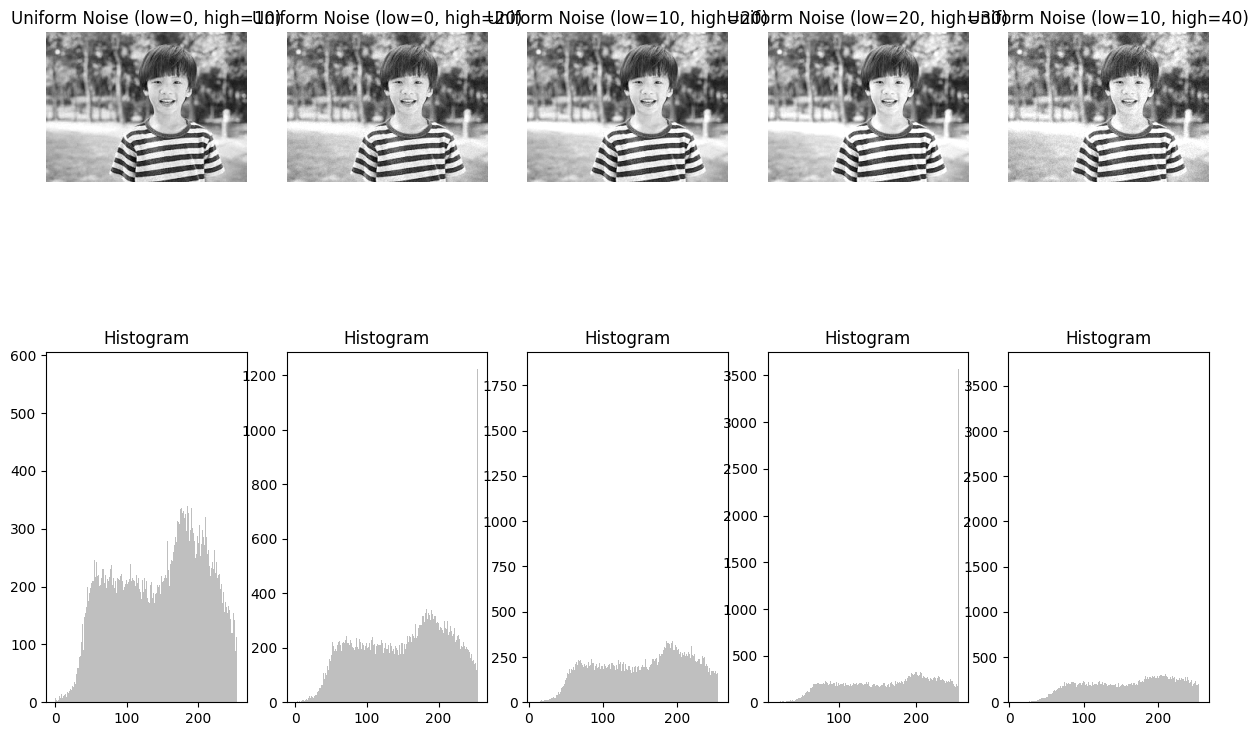

In [23]:
# 3.	Apply uniform noise of different low and high values, observe the image,
# its histogram and the differences. (at least five combinations are required)
uniform_images = [
    add_uniform_noise(image, low=0, high=10),
    add_uniform_noise(image, low=0, high=20),
    add_uniform_noise(image, low=10, high=20),
    add_uniform_noise(image, low=20, high=30),
    add_uniform_noise(image, low=10, high=40)
]
uniform_titles = ["Uniform Noise (low=0, high=10)", "Uniform Noise (low=0, high=20)",
                  "Uniform Noise (low=10, high=20)", "Uniform Noise (low=20, high=30)",
                  "Uniform Noise (low=10, high=40)"]

plot_images_with_histograms(uniform_images, uniform_titles)


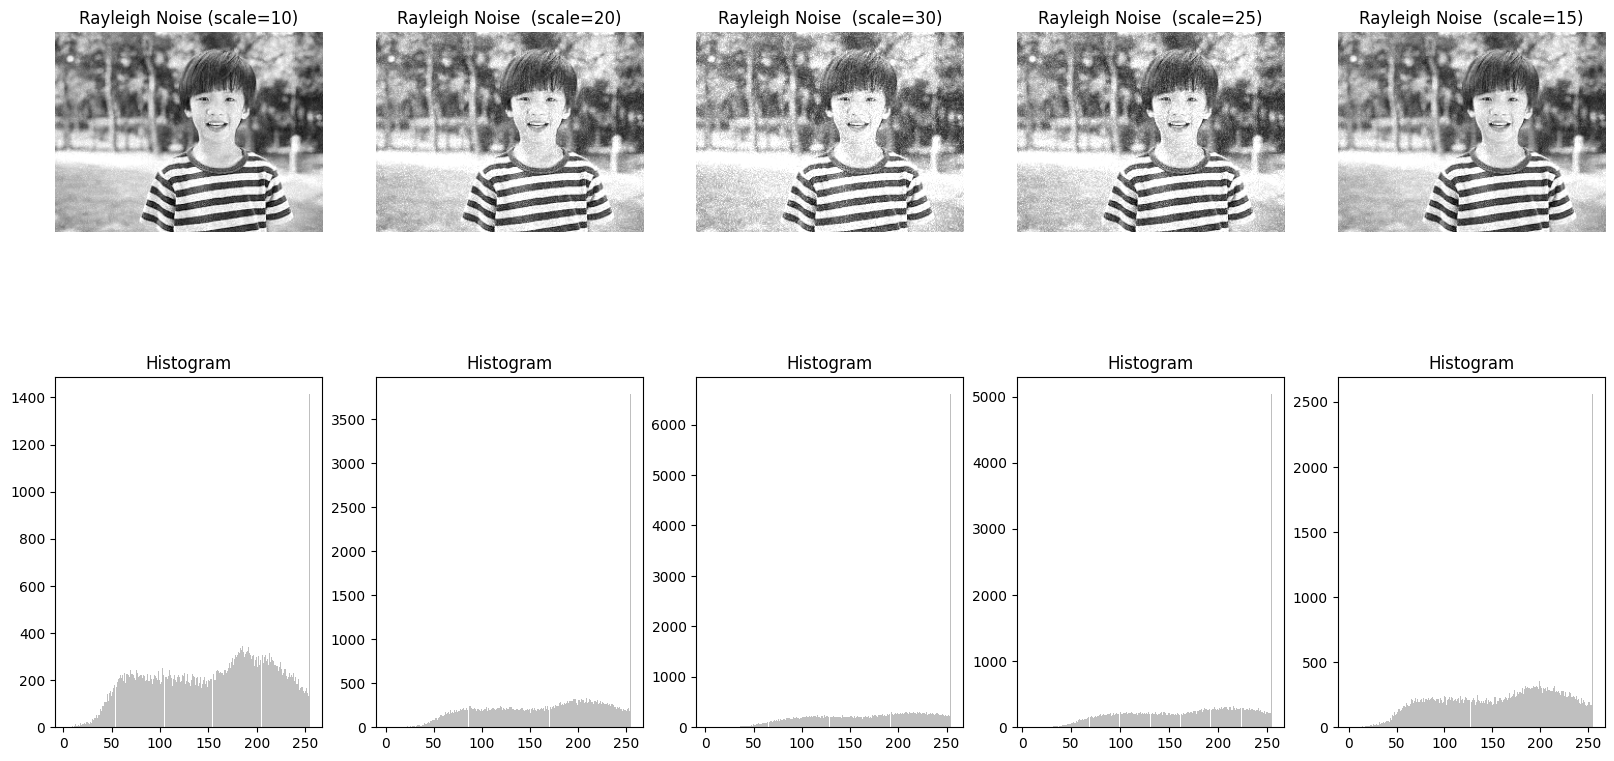

In [24]:
# 4.	Apply the remaining noise types to the input image and observe the same.
rayleigh_images = [
    add_rayleigh_noise(image, scale=10),
    add_rayleigh_noise(image, scale=20),
    add_rayleigh_noise(image, scale=30),
    add_rayleigh_noise(image, scale=25),
    add_rayleigh_noise(image, scale=15)
]
rayleigh_titles = ["Rayleigh Noise (scale=10)", "Rayleigh Noise  (scale=20)",
                  "Rayleigh Noise  (scale=30)", "Rayleigh Noise  (scale=25)",
                  "Rayleigh Noise  (scale=15)"]

plot_histograms(rayleigh_images, rayleigh_titles)

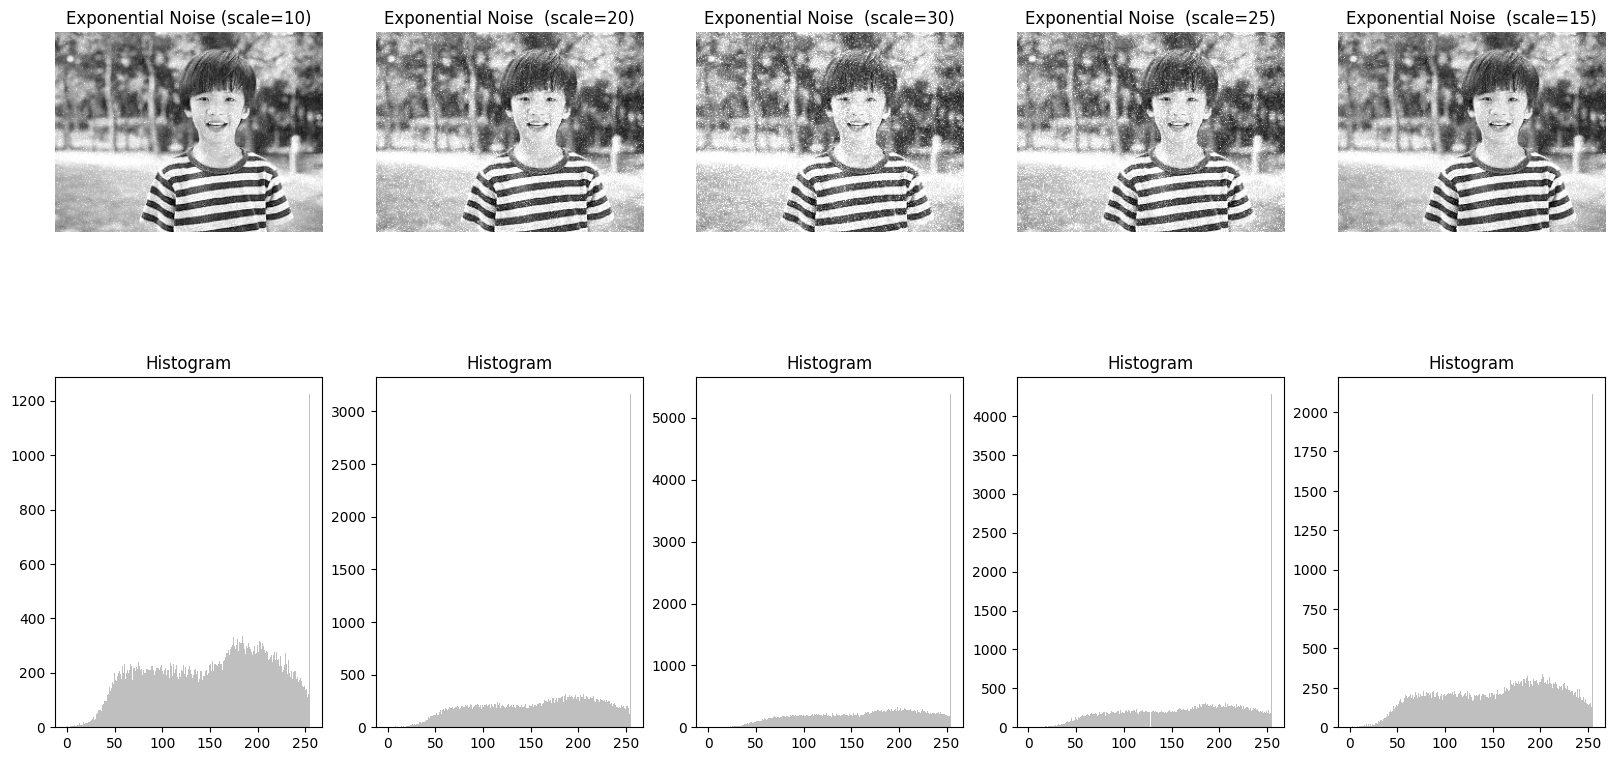

In [25]:
# 4.2	Apply the remaining noise types to the input image and observe the same.
exponential_images = [
    add_exponential_noise(image, scale=10),
    add_exponential_noise(image, scale=20),
    add_exponential_noise(image, scale=30),
    add_exponential_noise(image, scale=25),
    add_exponential_noise(image, scale=15)
]
exponential_titles = ["Exponential Noise (scale=10)", "Exponential Noise  (scale=20)",
                  "Exponential Noise  (scale=30)", "Exponential Noise  (scale=25)",
                  "Exponential Noise  (scale=15)"]

plot_histograms(exponential_images, exponential_titles)

**2.Implementing filters**

In [26]:
def apply_box(image_input, box, filt_size):
    pad_size = int(np.floor(filt_size / 2))
    image_padded = np.pad(image_input,
                          pad_width=((pad_size, pad_size), (pad_size, pad_size)),
                          mode='symmetric')
    image_box = copy.deepcopy(image_input)
    row, column = image_input.shape
    for i in range(row):
        for j in range(column):
            patch_curr = image_padded[i:i + filt_size, j:j + filt_size]
            results_box = box * patch_curr
            image_box[i, j] = np.sum(results_box)
    return image_box


In [27]:
import copy

def apply_geometric_mean_filter(image_input, filt_size):
    pad_size = int(np.floor(filt_size / 2))
    image_padded = np.pad(image_input, pad_width=((pad_size, pad_size), (pad_size, pad_size)), mode='symmetric')
    image_geometric = copy.deepcopy(image_input)
    row, column = image_input.shape

    for i in range(row):
        for j in range(column):
            patch = image_padded[i:i + filt_size, j:j + filt_size]
            image_geometric[i, j] = np.exp(np.sum(np.log(patch[patch > 0])) / patch.size)

    return image_geometric
##########################################
def apply_harmonic_mean_filter(image_input, filt_size):
    pad_size = int(np.floor(filt_size / 2))
    image_padded = np.pad(image_input, pad_width=((pad_size, pad_size), (pad_size, pad_size)), mode='symmetric')
    image_harmonic = copy.deepcopy(image_input)
    row, column = image_input.shape

    for i in range(row):
        for j in range(column):
            patch = image_padded[i:i + filt_size, j:j + filt_size]
            image_harmonic[i, j] = patch.size / np.sum(1 / (patch + 1e-5))

    return image_harmonic
######################################
def apply_contraharmonic_mean_filter(image_input, filt_size, Q):
    pad_size = int(np.floor(filt_size / 2))
    image_padded = np.pad(image_input, pad_width=((pad_size, pad_size), (pad_size, pad_size)), mode='symmetric')
    image_contraharmonic = copy.deepcopy(image_input)
    row, column = image_input.shape

    for i in range(row):
        for j in range(column):
            patch = image_padded[i:i + filt_size, j:j + filt_size]
            num = np.sum(patch**(Q + 1))
            den = np.sum(patch**Q + 1e-5)
            image_contraharmonic[i, j] = num / den if den != 0 else 0

    return image_contraharmonic
########################################################
def apply_median_filter(image_input, filt_size):
    pad_size = int(np.floor(filt_size / 2))
    image_padded = np.pad(image_input, pad_width=((pad_size, pad_size), (pad_size, pad_size)), mode='symmetric')
    image_median = copy.deepcopy(image_input)
    row, column = image_input.shape

    for i in range(row):
        for j in range(column):
            patch = image_padded[i:i + filt_size, j:j + filt_size]
            image_median[i, j] = np.median(patch)

    return image_median
###########################################
def apply_max_filter(image_input, filt_size):
    pad_size = int(np.floor(filt_size / 2))
    image_padded = np.pad(image_input, pad_width=((pad_size, pad_size), (pad_size, pad_size)), mode='symmetric')
    image_max = copy.deepcopy(image_input)
    row, column = image_input.shape

    for i in range(row):
        for j in range(column):
            patch = image_padded[i:i + filt_size, j:j + filt_size]
            image_max[i, j] = np.max(patch)

    return image_max
#############################################
def apply_min_filter(image_input, filt_size):
    pad_size = int(np.floor(filt_size / 2))
    image_padded = np.pad(image_input, pad_width=((pad_size, pad_size), (pad_size, pad_size)), mode='symmetric')
    image_min = copy.deepcopy(image_input)
    row, column = image_input.shape

    for i in range(row):
        for j in range(column):
            patch = image_padded[i:i + filt_size, j:j + filt_size]
            image_min[i, j] = np.min(patch)

    return image_min
##################################################
def apply_midpoint_filter(image_input, filt_size):
    pad_size = int(np.floor(filt_size / 2))
    image_padded = np.pad(image_input, pad_width=((pad_size, pad_size), (pad_size, pad_size)), mode='symmetric')
    image_midpoint = copy.deepcopy(image_input)
    row, column = image_input.shape

    for i in range(row):
        for j in range(column):
            patch = image_padded[i:i + filt_size, j:j + filt_size]
            image_midpoint[i, j] = (np.max(patch) + np.min(patch)) / 2

    return image_midpoint
###############################
def apply_alpha_trimmed_mean_filter(image_input, filt_size, alpha):
    pad_size = int(np.floor(filt_size / 2))
    image_padded = np.pad(image_input, pad_width=((pad_size, pad_size), (pad_size, pad_size)), mode='symmetric')
    image_alpha_trimmed = copy.deepcopy(image_input)
    row, column = image_input.shape

    for i in range(row):
        for j in range(column):
            patch = image_padded[i:i + filt_size, j:j + filt_size].flatten()
            trim = int(alpha * len(patch))
            trimmed_patch = np.sort(patch)[trim:-trim] if trim < len(patch) // 2 else patch
            image_alpha_trimmed[i, j] = np.mean(trimmed_patch)

    return image_alpha_trimmed
##########################

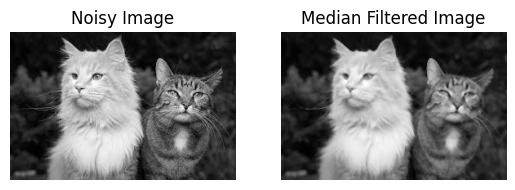

In [38]:
# 1.	Apply Gaussian noise on the input image, apply median filter of
# any window size to see if it improves the results
image = cv2.imread('/content/cats.jpg', cv2.IMREAD_GRAYSCALE)
noisy_image = add_gaussian_noise(image, mean=0, std=0.01)


noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
filtered_image = cv2.medianBlur(noisy_image, 3)


plt.subplot(1, 2, 1)
plt.imshow(noisy_image, cmap='gray')
plt.title("Noisy Image")
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Median Filtered Image")
plt.axis('off')
plt.show()


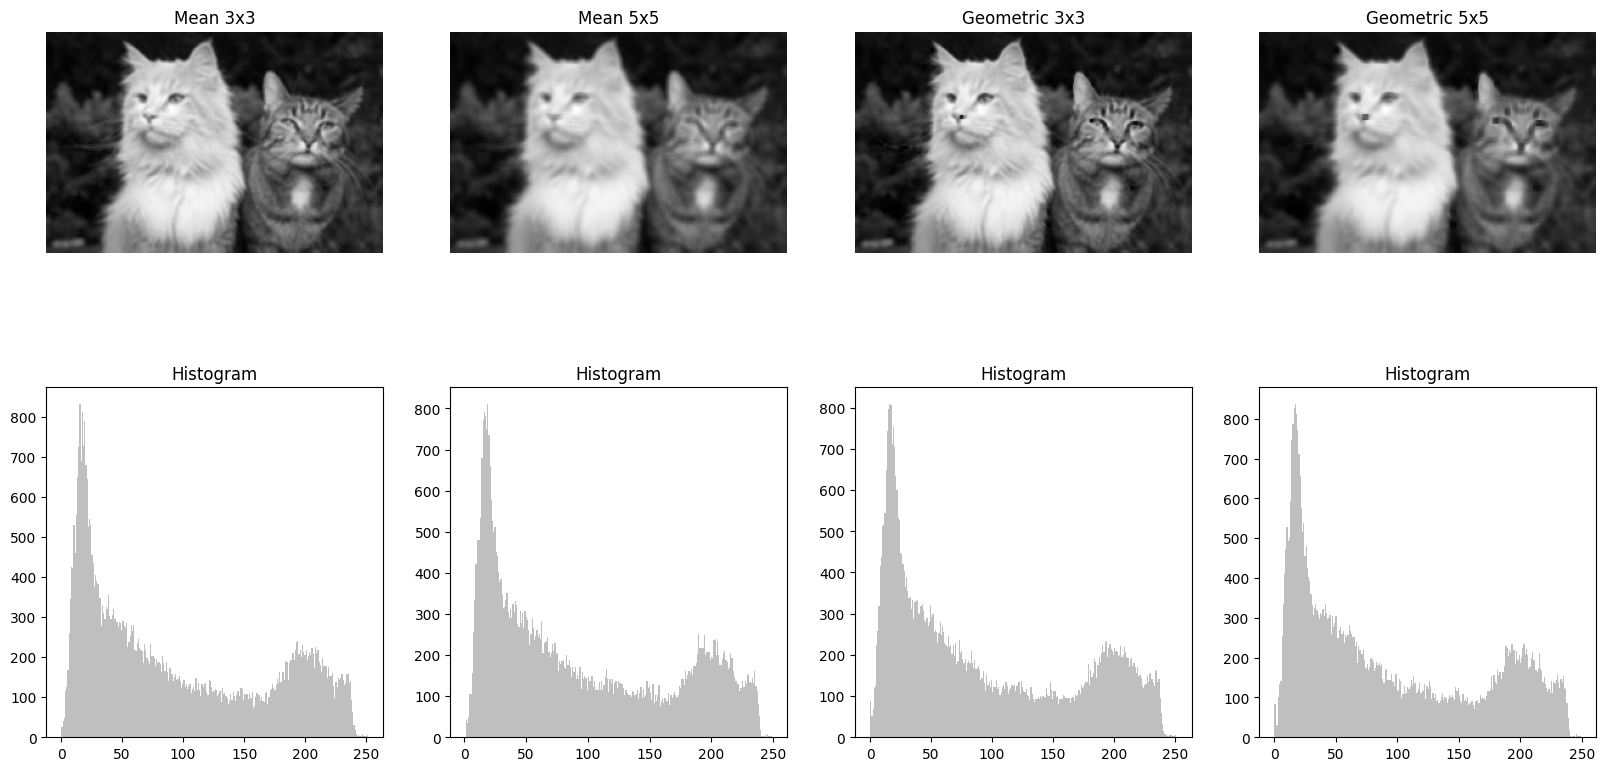

In [48]:
# 2.	Apply Gaussian noise of 0 mean and 0.0009 variance. Try denoising the image using
# 	3x3 and 5x5 mean filter
# 	3x3 and 5x5 geometric mean filter


noisy_image = add_gaussian_noise(image, mean=0, std=0.0009)

mean_3x3 = cv2.blur(noisy_image, (3, 3))
mean_5x5 = cv2.blur(noisy_image, (5, 5))

geom_3x3 = apply_geometric_mean_filter(noisy_image, filt_size=3)
geom_5x5 = apply_geometric_mean_filter(noisy_image, filt_size=5)

plot_histograms([mean_3x3, mean_5x5, geom_3x3, geom_5x5],["Mean 3x3", "Mean 5x5", "Geometric 3x3", "Geometric 5x5"])


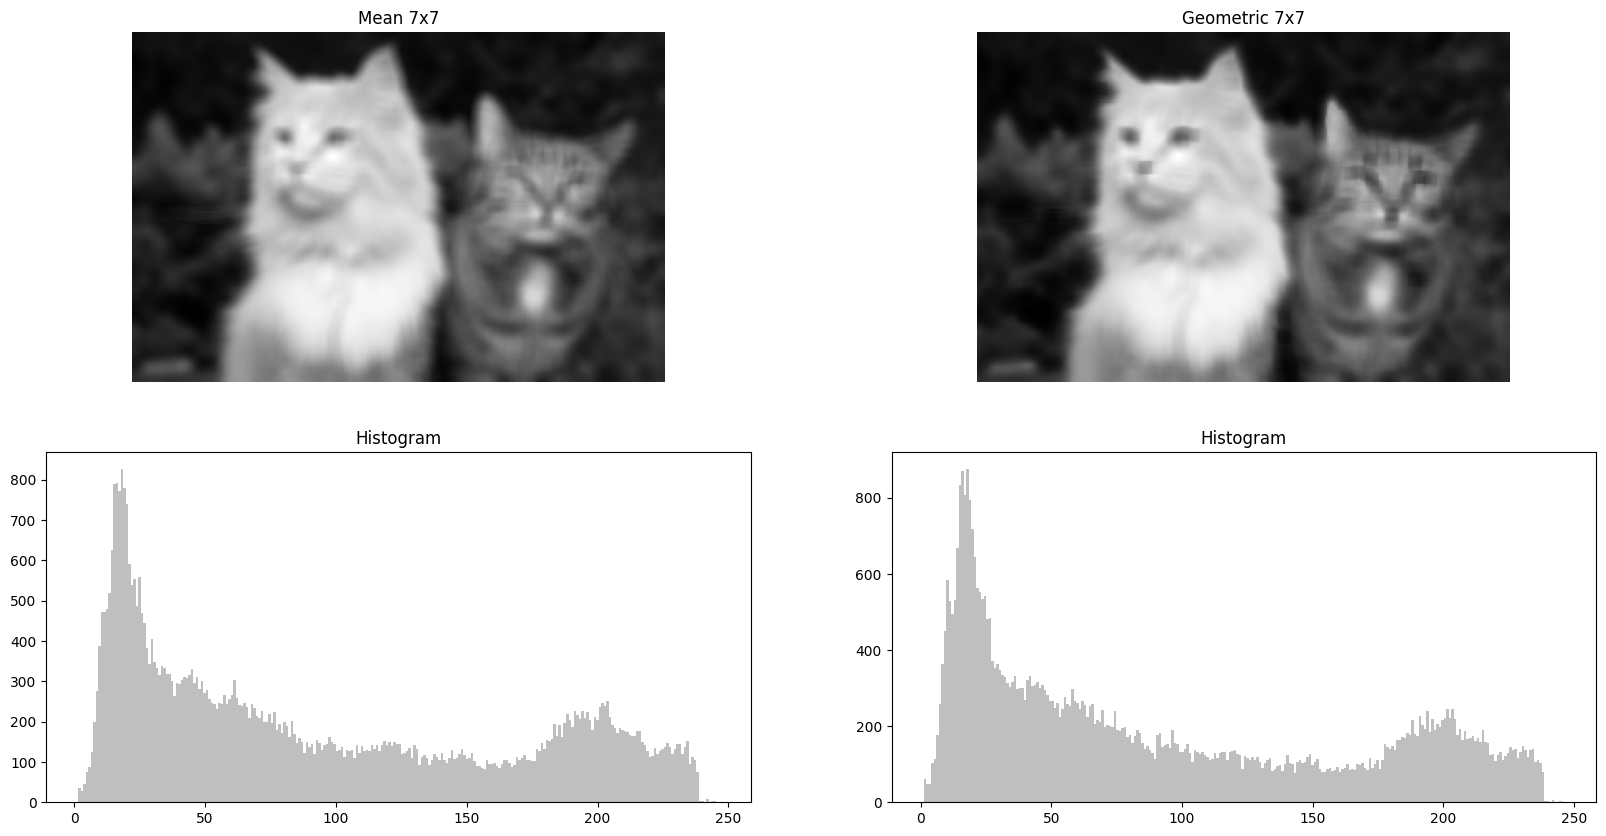

In [49]:
# 3.	Apply Gaussian noise of 0 mean and 0.09 variance. Try denoising the image using the filters discussed in 2nd task. If image doesn’t improve,
# try increasing the window size to 7x7 or higher to see if there is any progress.


noisy_image = add_gaussian_noise(image, mean=0, std=0.09)

mean_7x7 = cv2.blur(noisy_image, (7, 7))
geom_7x7 = apply_geometric_mean_filter(noisy_image, filt_size=7)

plot_histograms([mean_7x7, geom_7x7], ["Mean 7x7", "Geometric 7x7"])



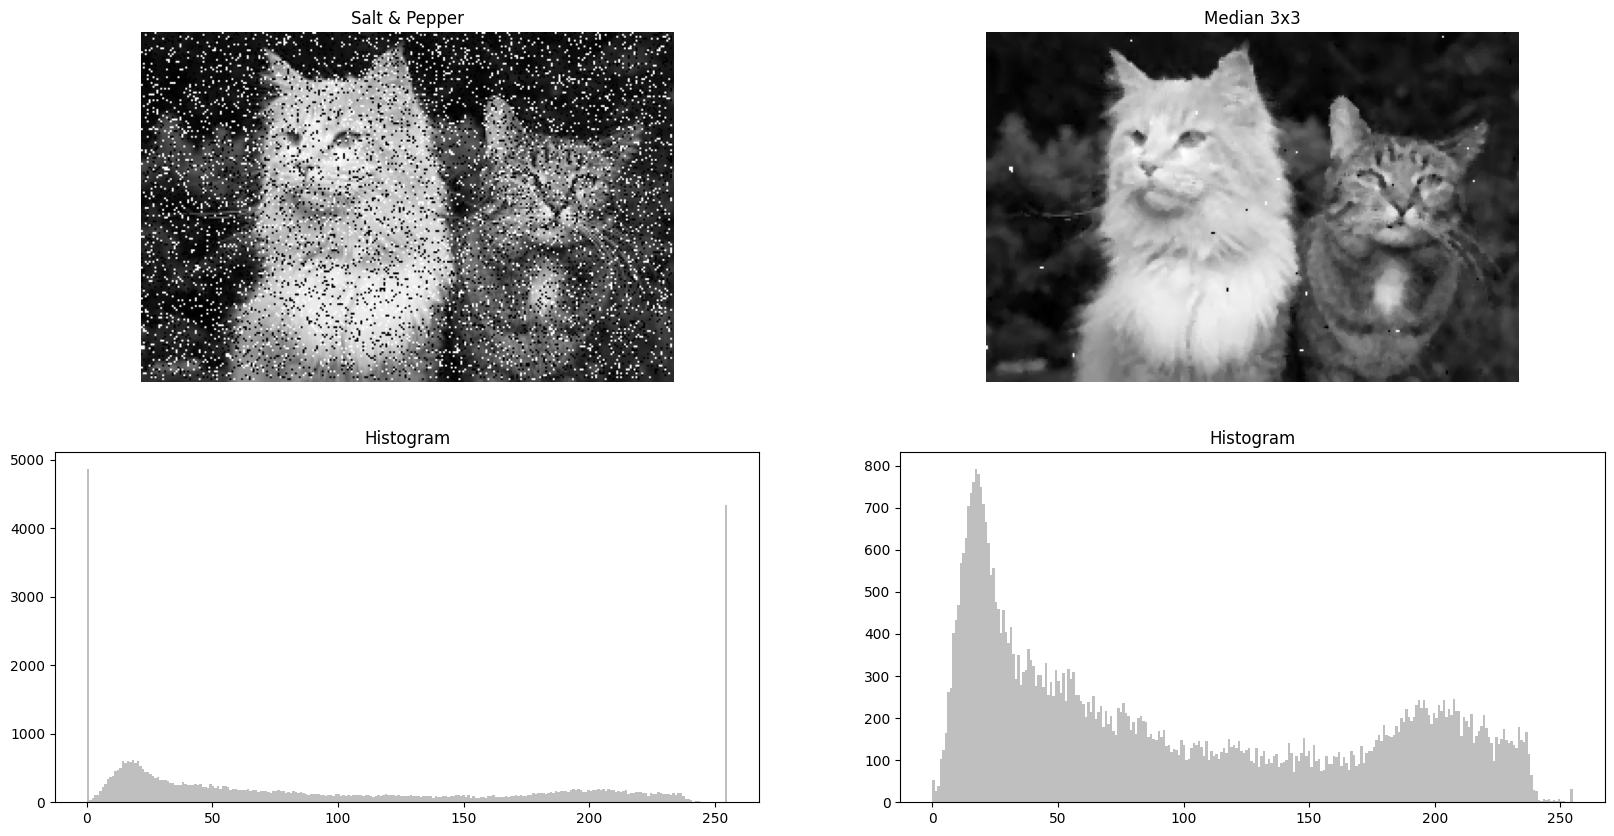

In [51]:
# 4.	Apply salt & pepper noise
# with 0.1 probability for both salt and pepper. Apply 3x3 median filter to see if it improves.

noisy_image = add_salt_pepper_noise(image, salt_prob=0.1, pepper_prob=0.1)
filtered_image = cv2.medianBlur(noisy_image, 3)

plot_histograms([noisy_image, filtered_image], ["Salt & Pepper", "Median 3x3"])


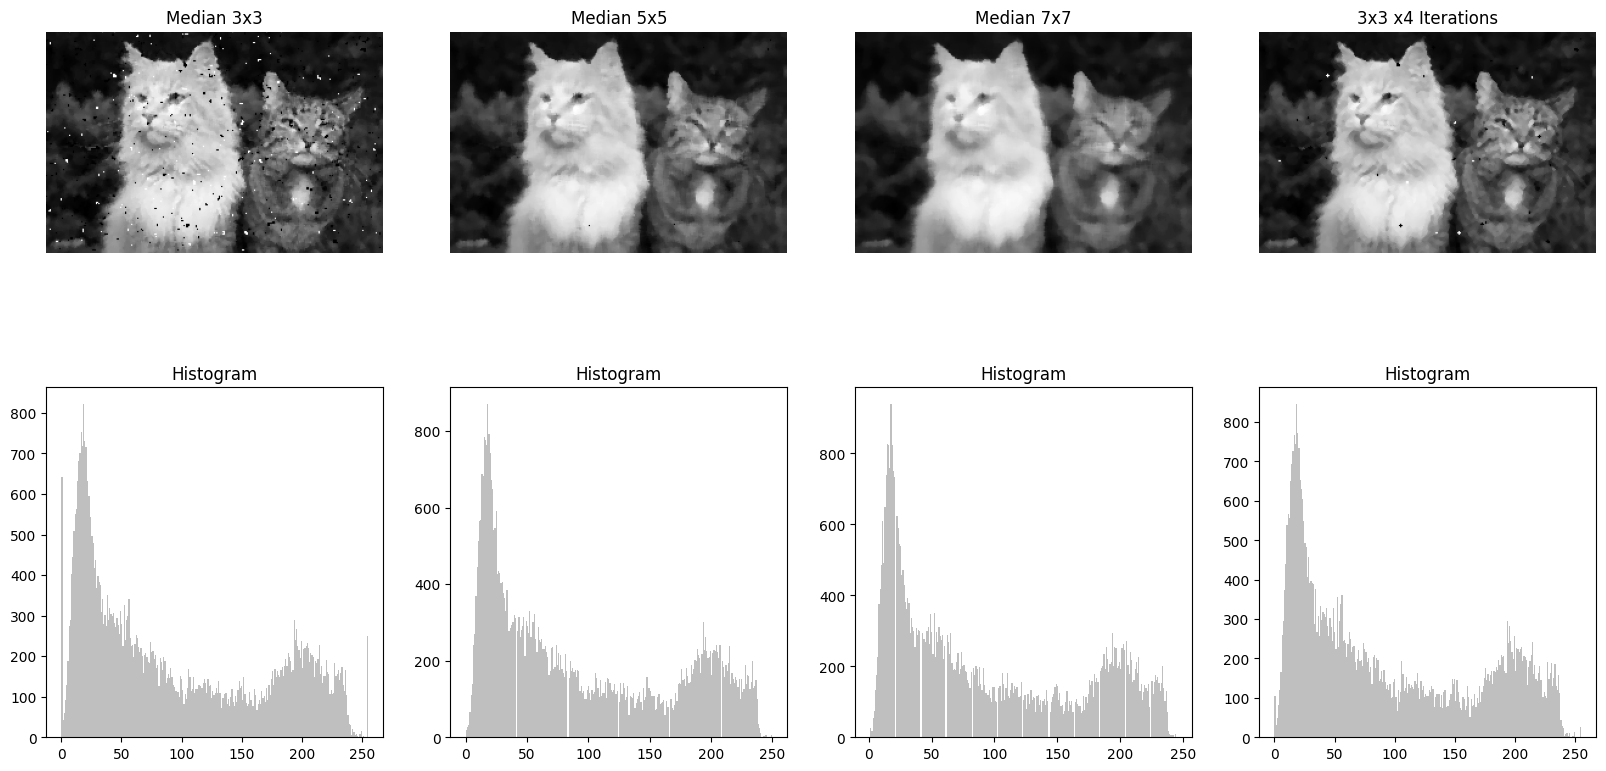

In [52]:
# 5.	Apply salt & pepper noise with 0.2 probability for both salt and pepper.
# Apply 3x3 median filter to see if it improves. If it doesn’t improve, apply the following
# 	5x5 median filter
# 	7x7 median filter
# 	3x3 median filter with 4 iterations

noisy_image = add_salt_pepper_noise(image, salt_prob=0.2, pepper_prob=0.2)
median_3x3 = cv2.medianBlur(noisy_image, 3)
median_5x5 = cv2.medianBlur(noisy_image, 5)
median_7x7 = cv2.medianBlur(noisy_image, 7)
median_3x3_4x = cv2.medianBlur(median_3x3, 3)

plot_histograms([median_3x3, median_5x5, median_7x7, median_3x3_4x],["Median 3x3", "Median 5x5", "Median 7x7", "3x3 x4 Iterations"])



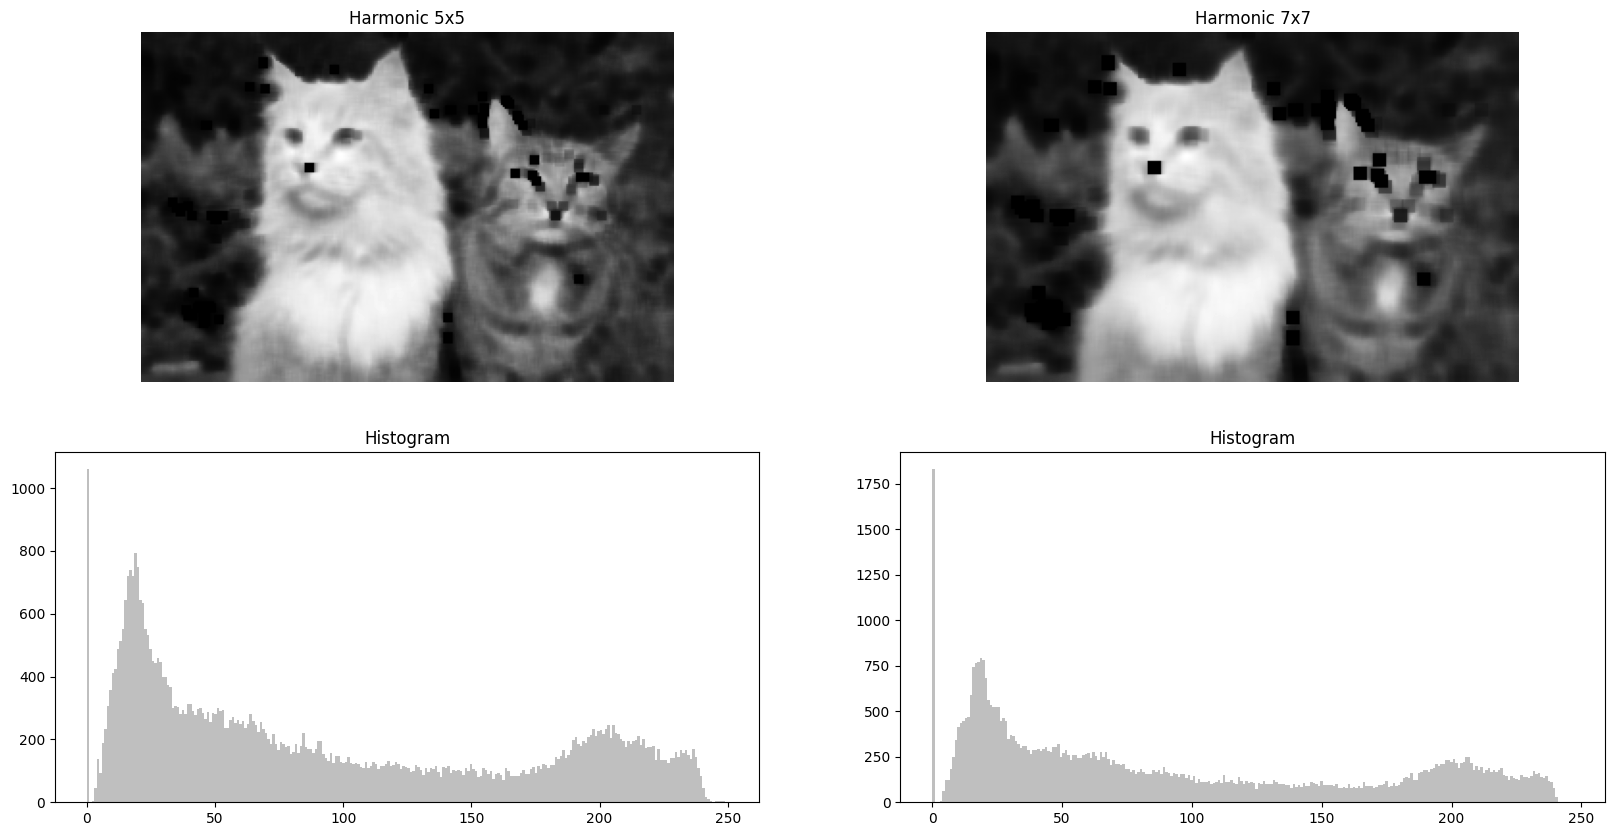

In [53]:
# 6.	Add Gaussian noise of 0 mean and 0.0009 variance followed by addition of salt & pepper noise
# with probability of 0.1 for salt and probability of 0 for pepper. Apply harmonic mean filter
# of size 5x5 and observe the results. If results aren’t improved, try increasing the window size.

noisy_image_gaussian = add_gaussian_noise(image, mean=0, std=0.0009)
noisy_com = add_salt_pepper_noise(noisy_image_gaussian, salt_prob=0.1, pepper_prob=0.0)

harmonic_5x5 = apply_harmonic_mean_filter(noisy_com, filt_size=5)
harmonic_7x7 = apply_harmonic_mean_filter(noisy_com, filt_size=7)

plot_histograms([harmonic_5x5, harmonic_7x7], ["Harmonic 5x5", "Harmonic 7x7"])


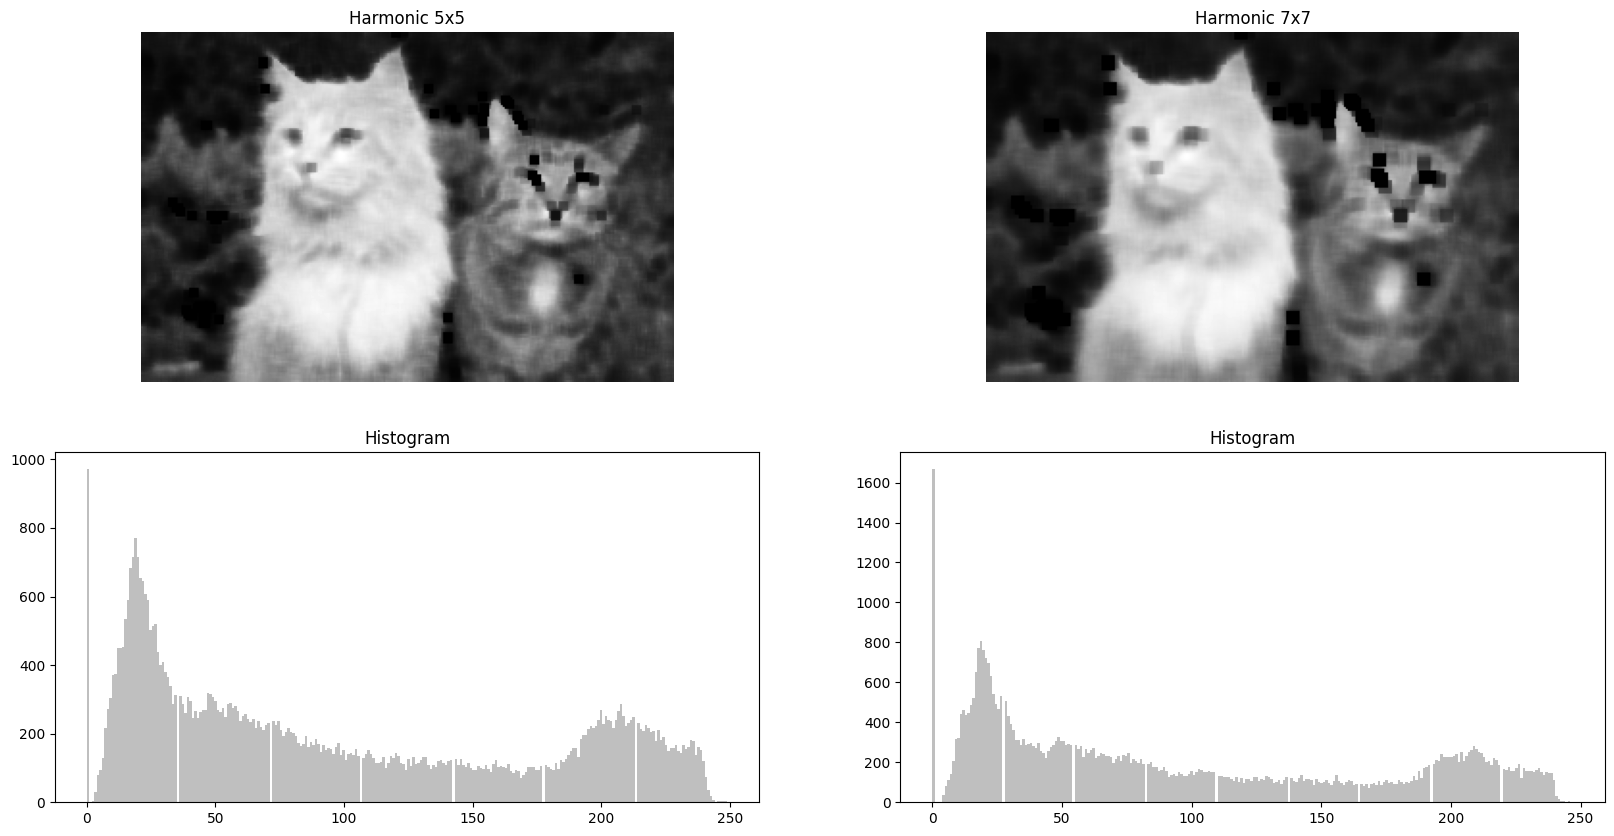

In [54]:
# 7.	Add salt & pepper noise of probability of 0.2 for salt and probability of 0 for pepper.
# Apply harmonic mean filter of different window sizes and mention the window size that works well.

noisy_image = add_salt_pepper_noise(image, salt_prob=0.2, pepper_prob=0.0)

harmonic_5x5 = apply_harmonic_mean_filter(noisy_image, filt_size=5)
harmonic_7x7 = apply_harmonic_mean_filter(noisy_image, filt_size=7)

plot_histograms([harmonic_5x5, harmonic_7x7], ["Harmonic 5x5", "Harmonic 7x7"])


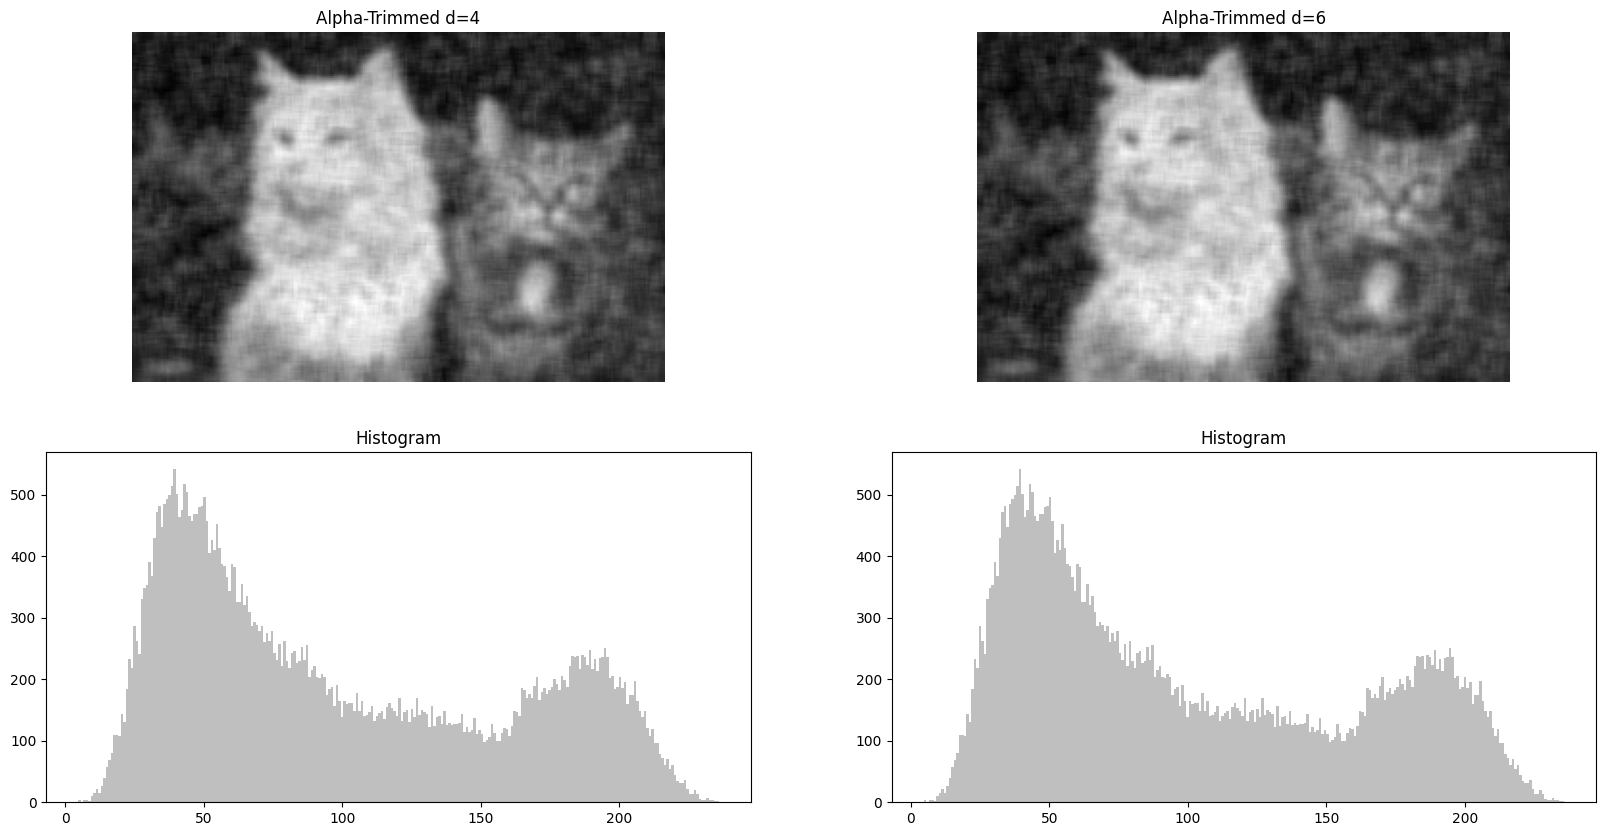

In [56]:
# 8.	Apply alpha trimmed mean filter to the image with 0 mean and 0.009 variance for the
#   Gaussian noise followed by application of salt & pepper noise with salt probability of 0.1 and
# pepper probability of 0.1. Use window size of 7x7 and use different values
# of d such as 4, 6, 8, 10, 12, 14, 16 and mention the one that works well.

noisy_image_gaussian = add_gaussian_noise(image, mean=0, std=0.009)
noisy_combined = add_salt_pepper_noise(noisy_image_gaussian, salt_prob=0.1, pepper_prob=0.1)

alpha_4 = apply_alpha_trimmed_mean_filter(noisy_combined, filt_size=7, alpha=4)
alpha_6 = apply_alpha_trimmed_mean_filter(noisy_combined, filt_size=7, alpha=6)

plot_histograms([alpha_4, alpha_6], ["Alpha-Trimmed d=4", "Alpha-Trimmed d=6"])


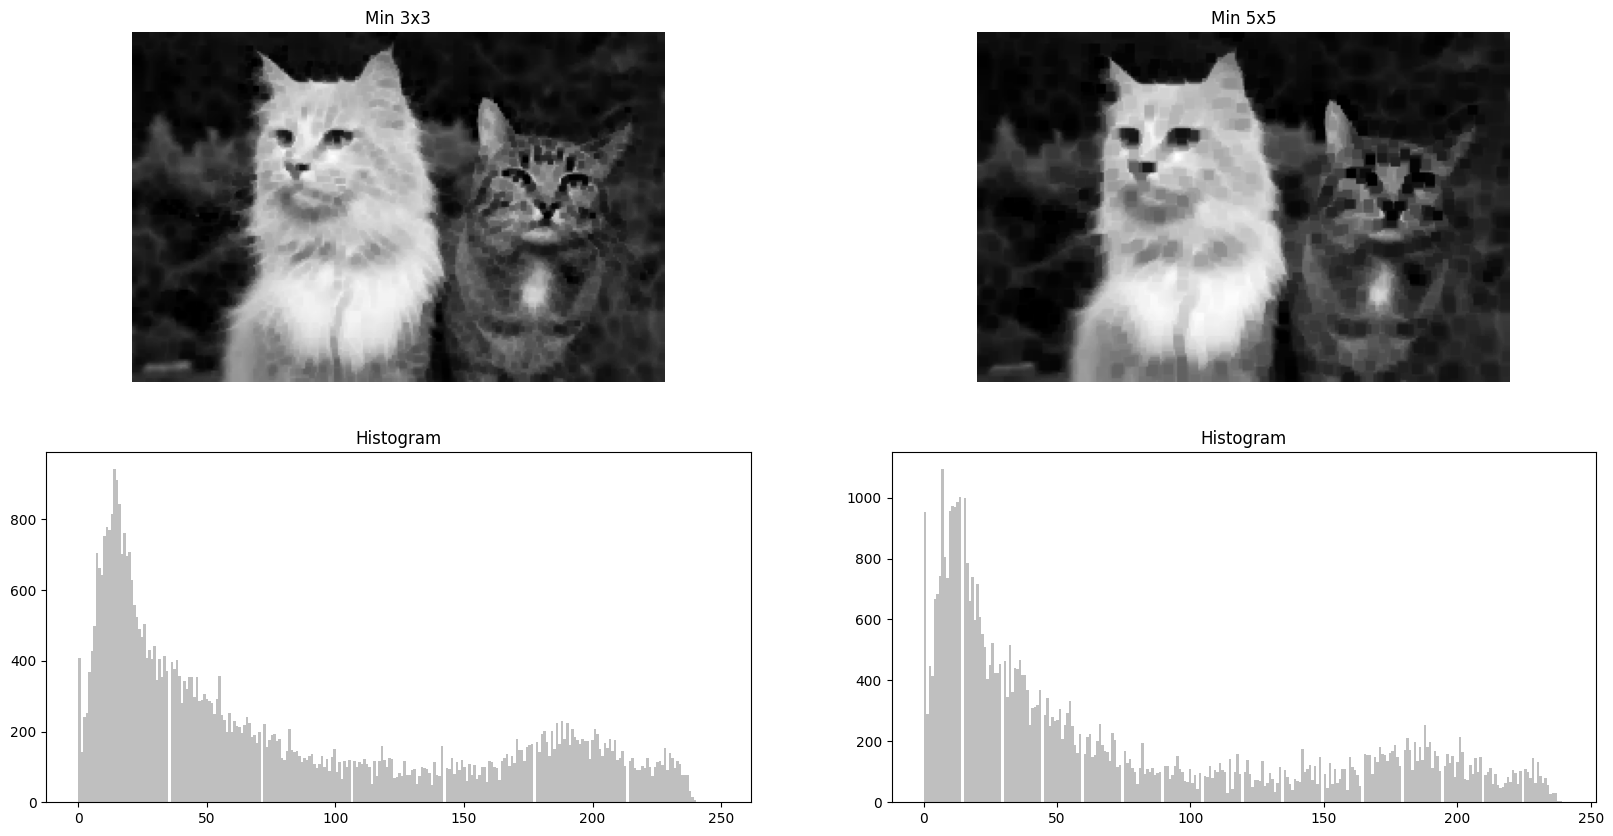

In [57]:
# 9-10.
# 9.	Add salt & pepper noise of probability of 0.2 for salt and probability of 0 for pepper. Apply min filter with window size of 3
# 10.	Add salt & pepper noise of probability of 0.5 for salt and probability of 0 for pepper. Apply min filter with window size of 3. If it doesn’t work, use other window sizes and choose the best one.

noisy_image_sp = add_salt_pepper_noise(image, salt_prob=0.2, pepper_prob=0.0)
min_3x3 = apply_min_filter(noisy_image_sp, filt_size=3)
min_5x5 = apply_min_filter(noisy_image_sp, filt_size=5)

plot_histograms([min_3x3, min_5x5], ["Min 3x3", "Min 5x5"])


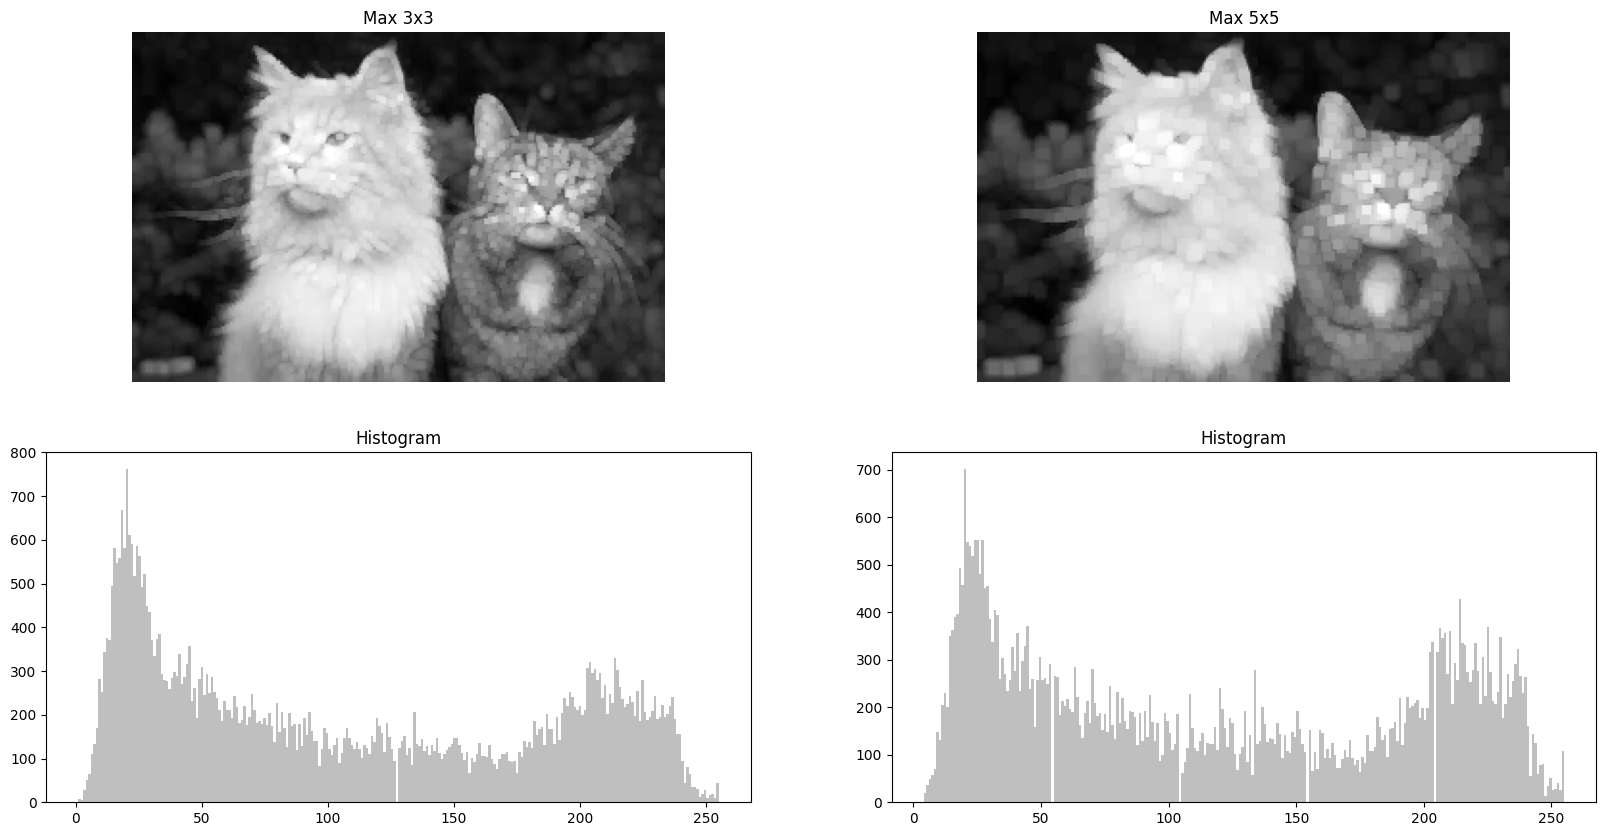

In [58]:
# 11-12.
# 11.	Add salt & pepper noise of probability of 0.2 for pepper and probability of 0 for salt. Apply max filter with window size of 3
# 12.	Add salt & pepper noise of probability of 0.5 for pepper and probability of 0 for salt. Apply max filter with window size of 3. If it doesn’t work, use other window sizes and choose the best one.

noisy_image_pepper = add_salt_pepper_noise(image, salt_prob=0.0, pepper_prob=0.2)
max_3x3 = apply_max_filter(noisy_image_pepper, filt_size=3)
max_5x5 = apply_max_filter(noisy_image_pepper, filt_size=5)

plot_histograms([max_3x3, max_5x5], ["Max 3x3", "Max 5x5"])


**Task 3:**

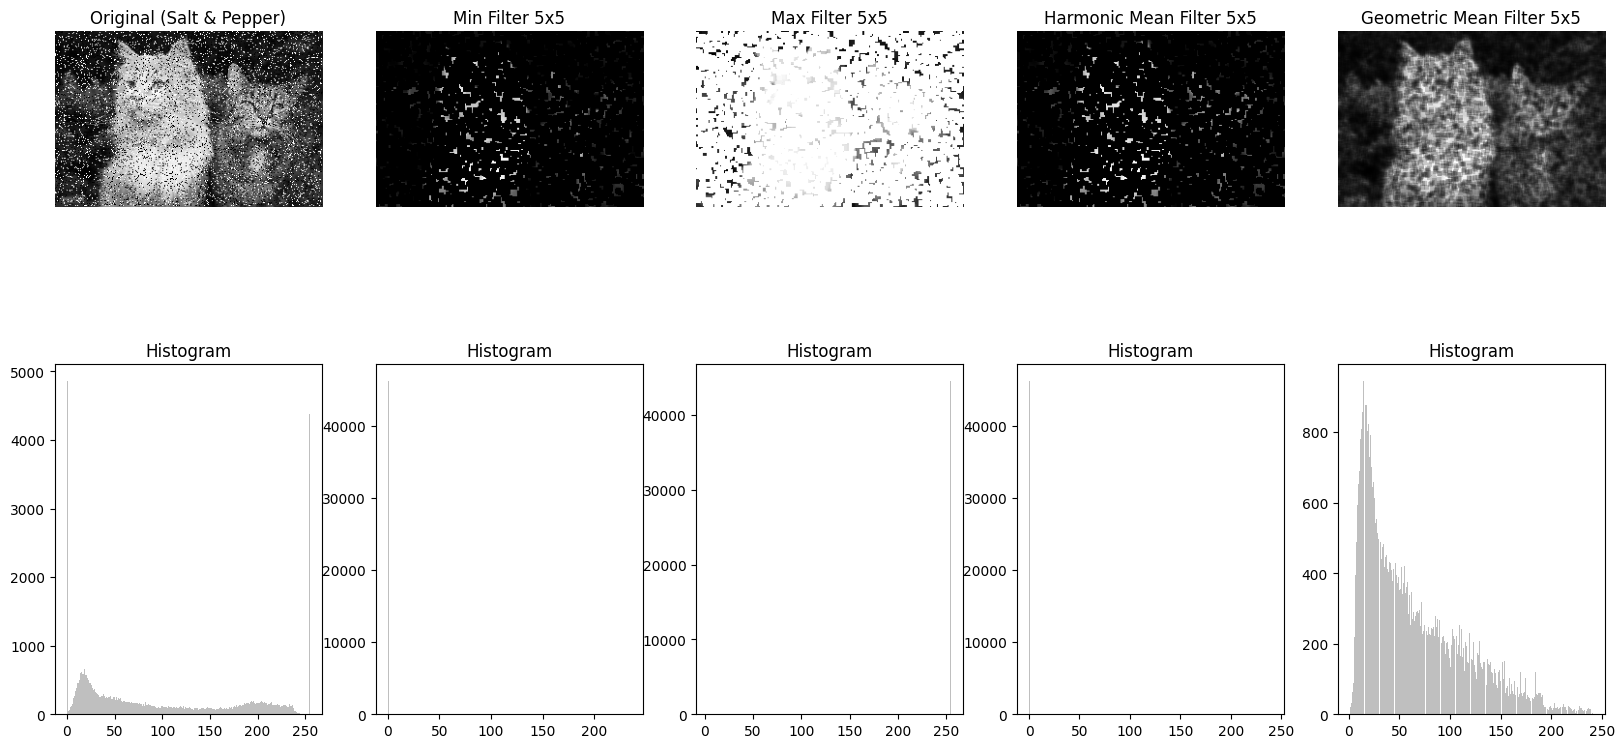

In [61]:
# 1.	Apply salt & pepper noise with 0.1 probability for both salt and pepper. Apply the following to see if they are of any benefit
# 	5x5 min filter
# 	5x5 max filter
# 	5x5 harmonic mean filter
# 	5x5 geometric mean filter

noisy_image = add_salt_pepper_noise(image, salt_prob=0.1, pepper_prob=0.1)

min_5x5 = apply_min_filter(noisy_image, filt_size=5)
max_5x5 = apply_max_filter(noisy_image, filt_size=5)
harmonic_5x5 = apply_harmonic_mean_filter(noisy_image, filt_size=5)
geometric_5x5 = apply_geometric_mean_filter(noisy_image, filt_size=5)

plot_histograms([noisy_image, min_5x5, max_5x5, harmonic_5x5, geometric_5x5],["Original (Salt & Pepper)", "Min Filter 5x5", "Max Filter 5x5",
                             "Harmonic Mean Filter 5x5", "Geometric Mean Filter 5x5"])



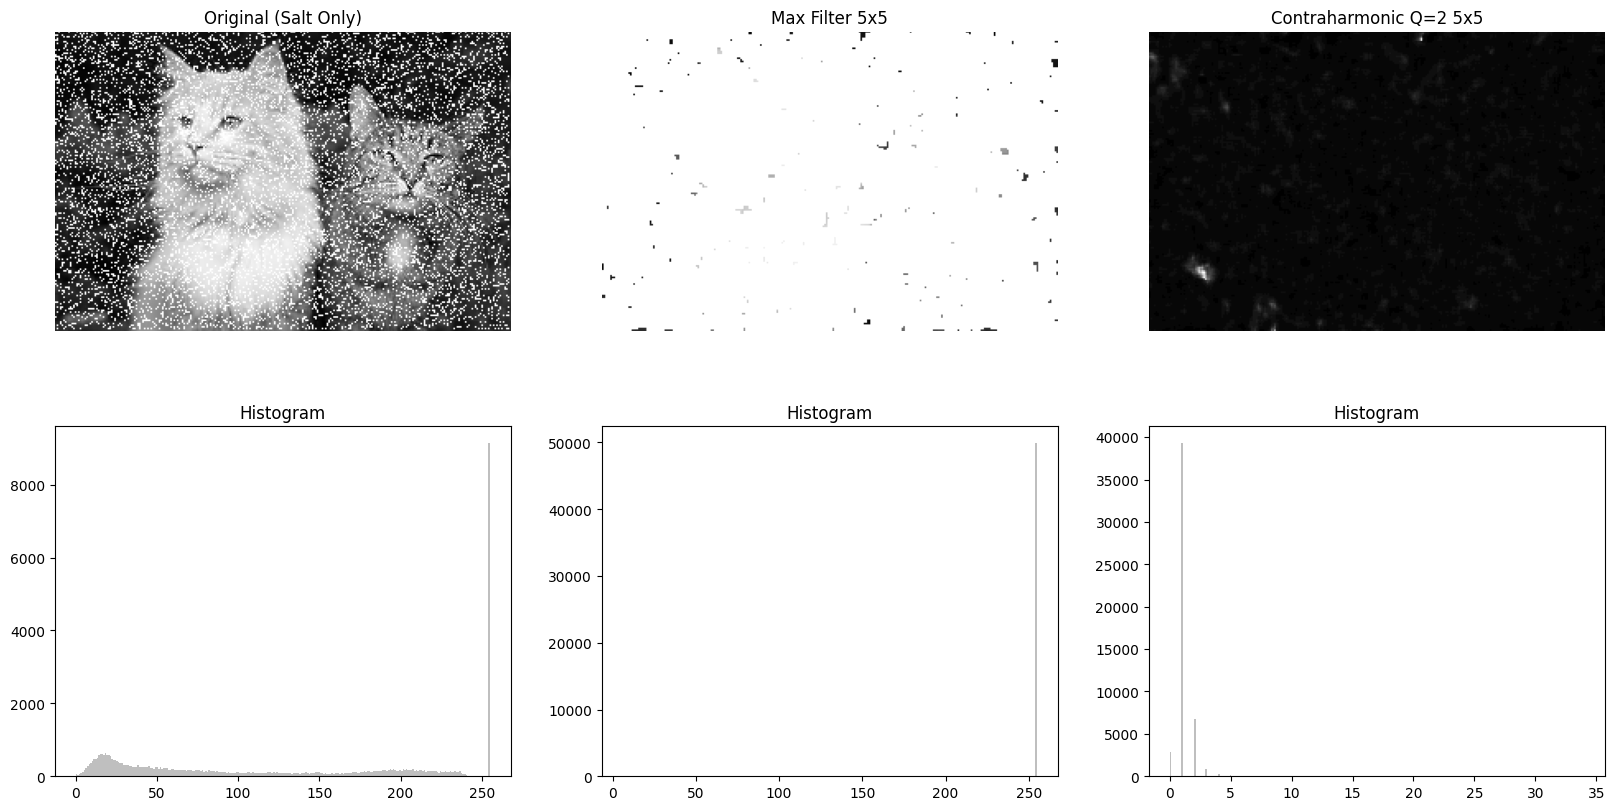

In [62]:
# 2.Add salt & pepper noise of probability of 0.2 for salt and probability of 0 for pepper. Apply the following to see if they are of any use
# 	5x5 max filter
# 	Contraharmonic mean filter of size 5x5 and Q=2

noisy_image_salt = add_salt_pepper_noise(image, salt_prob=0.2, pepper_prob=0.0)

max_5x5 = apply_max_filter(noisy_image_salt, filt_size=5)
contraharmonic_5x5_Q2 = apply_contraharmonic_mean_filter(noisy_image_salt, filt_size=5, Q=2)

plot_histograms([noisy_image_salt, max_5x5, contraharmonic_5x5_Q2],
                            ["Original (Salt Only)", "Max Filter 5x5", "Contraharmonic Q=2 5x5"])


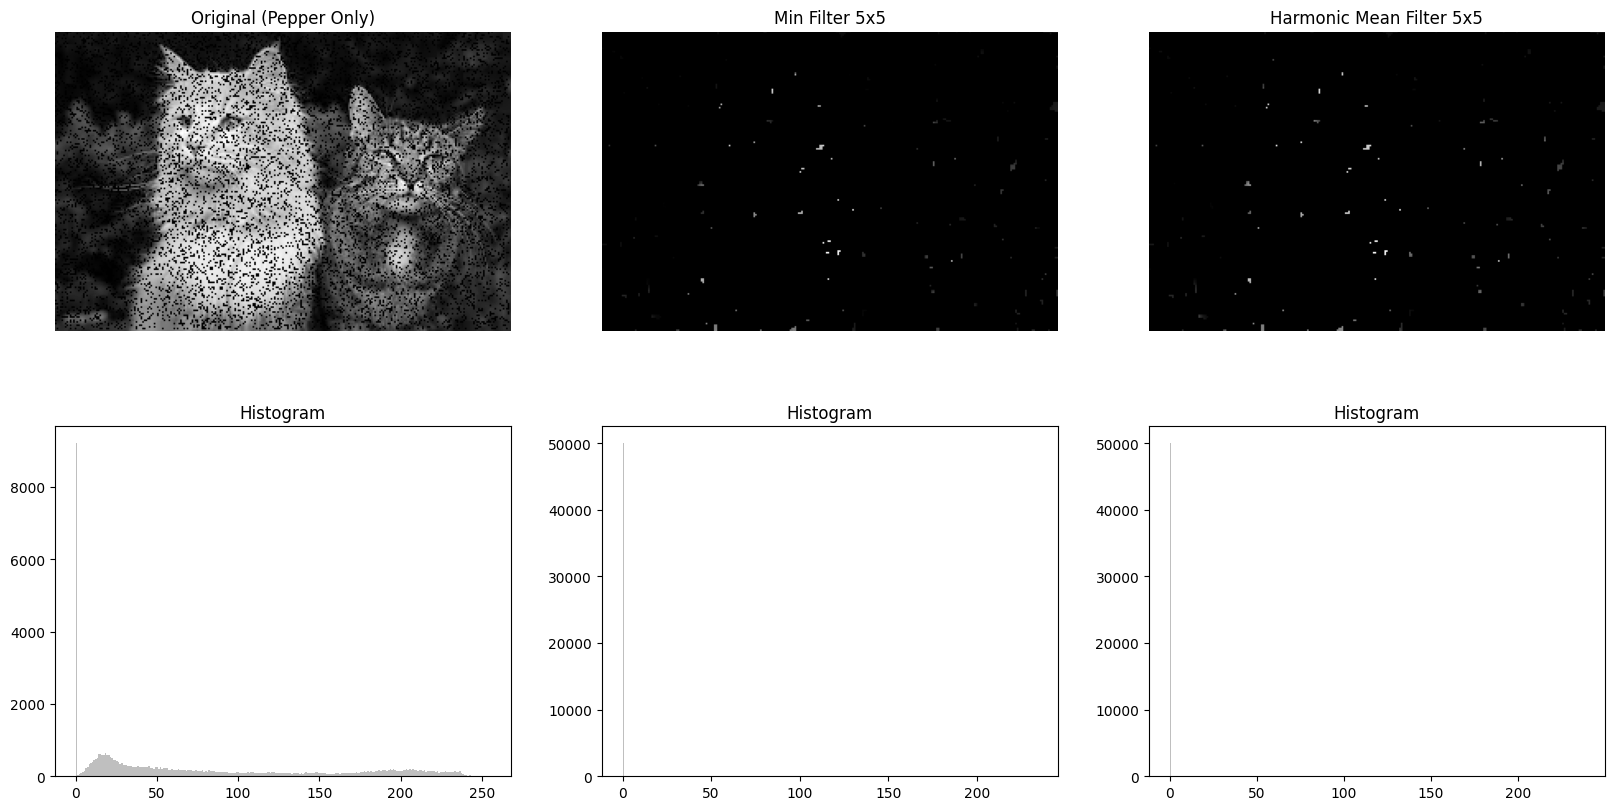

In [67]:
# 3.	Add salt & pepper noise of probability of 0.2 for pepper and probability of 0 for salt. Apply the following to see if they are of any use
# 	5x5 min filter
# 	Contraharmonic mean filter of size 5x5 and Q= -2
# 	5x5 harmonic mean filter

noisy_image_pepper = add_salt_pepper_noise(image, salt_prob=0.0, pepper_prob=0.2)

min_5x5 = apply_min_filter(noisy_image_pepper, filt_size=5)
# contraharmonic_5x5_Q_neg2 = apply_contraharmonic_mean_filter(noisy_image_pepper, filt_size=5, Q=-2)

# # The error has been occured->>>>>ValueError: Integers to negative integer powers are not allowed.
harmonic_5x5 = apply_harmonic_mean_filter(noisy_image_pepper, filt_size=5)

plot_histograms([noisy_image_pepper, min_5x5,  harmonic_5x5],
                            ["Original (Pepper Only)", "Min Filter 5x5",  "Harmonic Mean Filter 5x5"])

